<div align="center">
  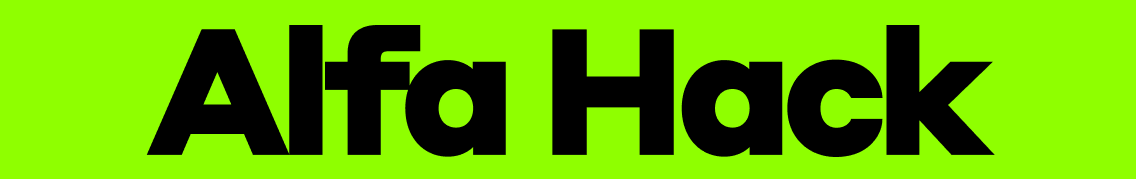
</div>

## Этап 1. Установка библиотек и импорт данных

In [ ]:
# Cкачиваем необходимые библиотеки для работы
!pip install pandas numpy scikit-learn

In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import glob
import os
import pickle

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 3"_, то необходимо поменять путь к директории и ссылки ниже

In [3]:
# Путь к папке с тренировочными данными
path_train = 'C:/Users/Даниил/Downloads/Кейс-3. Отток юридических лиц из расчетно-кассового обслуживания/train'
# Путь к папке с тестовыми данными
path_test = 'C:/Users/Даниил/Downloads/Кейс-3. Отток юридических лиц из расчетно-кассового обслуживания/test'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Получим список файлов в каждой из папок с данными

In [4]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_1.csv', 'train_10.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv', 'train_6.csv', 'train_7.csv', 'train_8.csv', 'train_9.csv']
Список файлов в репозитории test: ['test_1.csv', 'test_10.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv', 'test_6.csv', 'test_7.csv', 'test_8.csv', 'test_9.csv']


Объединим тренировочные и тестовые данные в единые датасеты train и test

In [4]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строки и {} столбцов'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 413194 строки и 189 столбцов'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,0,train,0,0.160673,0.967855,-0.744988,0.312510,0.747232,-1.033859,50.0,...,-1.253606,-0.907266,9.0,1.482576,0.110931,1.832169,0.731675,-0.739851,99.0,-0.005449
1,0,train,1,1.215775,0.409084,-0.499872,1.081988,0.709146,1.164660,1.0,...,-0.106539,-0.701140,9.0,0.175049,0.532301,0.116916,-1.229896,1.331139,1.0,-0.353498
2,1,train,2,-0.622386,-0.220737,-0.967224,-1.213633,-0.782765,-0.352342,2.0,...,-0.435479,-0.585773,9.0,0.100763,-0.586752,-0.514722,-0.688141,0.290357,2.0,-0.553296
3,0,train,3,-1.943180,-0.222065,1.143199,1.430957,1.120050,-0.898908,3.0,...,-0.989614,-1.490202,9.0,0.556689,0.320663,0.057659,0.987459,1.749471,3.0,0.950720
4,0,train,4,0.473792,0.204881,-0.382441,0.397711,-0.419451,1.178728,2.0,...,2.170770,0.879764,9.0,0.119195,0.548174,0.108961,1.447481,-0.129048,2.0,2.083665


smpl
train    413194
Name: count, dtype: int64

## Этап 2. Работа с моделью

In [5]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
data_test['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 413194 строк и 189 столбцов'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,0,train,0,0.160673,0.967855,-0.744988,0.312510,0.747232,-1.033859,50.0,...,-1.253606,-0.907266,9.0,1.482576,0.110931,1.832169,0.731675,-0.739851,99.0,-0.005449
1,0,train,1,1.215775,0.409084,-0.499872,1.081988,0.709146,1.164660,1.0,...,-0.106539,-0.701140,9.0,0.175049,0.532301,0.116916,-1.229896,1.331139,1.0,-0.353498
2,1,train,2,-0.622386,-0.220737,-0.967224,-1.213633,-0.782765,-0.352342,2.0,...,-0.435479,-0.585773,9.0,0.100763,-0.586752,-0.514722,-0.688141,0.290357,2.0,-0.553296
3,0,train,3,-1.943180,-0.222065,1.143199,1.430957,1.120050,-0.898908,3.0,...,-0.989614,-1.490202,9.0,0.556689,0.320663,0.057659,0.987459,1.749471,3.0,0.950720
4,0,train,4,0.473792,0.204881,-0.382441,0.397711,-0.419451,1.178728,2.0,...,2.170770,0.879764,9.0,0.119195,0.548174,0.108961,1.447481,-0.129048,2.0,2.083665


smpl
train    413194
Name: count, dtype: int64

In [6]:
# Выделим признаки для обучения и искомый признак в датасете train
# для обучения модели
X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred = gbdt_clf.predict_proba(X_test)

# Переведем предсказание в формат Series
y_pred = pd.Series(y_pred[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

Метрика roc-auc на валидационных данных имеет значение: 0.8046222523097128


## Этап 3: обработка данных

In [7]:
# нормализация(базовая)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))
#print(scaler.mean_)
X_new = scaler.transform(X)
print(X_new)

StandardScaler()
[[-1.73204662  0.13153345  0.95328183 ... -0.75487496  5.89497436
  -0.02104687]
 [-1.73203823  1.17807131  0.39807058 ...  1.30730283 -0.47131432
  -0.36706455]
 [-1.73202985 -0.64516941 -0.22773786 ...  0.27094978 -0.4063522
  -0.56569648]
 ...
 [ 1.38558951  0.11411102 -0.05947087 ... -1.56552548  4.20595899
   0.45801294]
 [ 1.38559789  0.0487299   0.39515613 ...  0.11714565 -0.4063522
  -0.63786297]
 [ 1.38560627 -0.25352649 -0.58045032 ...  0.33804838 -0.4063522
   0.02322861]]


In [8]:
file_path = 'C:/Users/Даниил/Downloads/mi_scores.pkl'

# Open the file in binary mode and load the data
with open(file_path, 'rb') as file:
    mi_scores_df = pickle.load(file)
print(mi_scores_df)

             MI Score
feature_71   0.043069
feature_109  0.027147
feature_72   0.026902
feature_127  0.026851
feature_16   0.026248
...               ...
feature_45   0.000000
feature_48   0.000000
feature_131  0.000000
feature_159  0.000000
feature_37   0.000000

[187 rows x 1 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif


df_X = X_new
df_y = data_train.target  # Целевая переменная

# Рассчитываем MI score для каждого признака
mi_scores = mutual_info_classif(df_X, df_y)

# Создаем DataFrame для удобного отображения результатов
mi_scores_df = pd.DataFrame(mi_scores, index=X, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)


mi_scores_df.to_pickle('mi_scores.pkl')

In [9]:
#print(mi_scores_df[:60])
df = pd.DataFrame(mi_scores_df)

# Подсчет количества строк, где значение в столбце 'MI Score' больше 0.003
count_greater_than_0_003 = df[df['MI Score'] > 0.002].shape[0]

print(count_greater_than_0_003)
mi_scores_df.index[:60]

86


Index(['feature_71', 'feature_109', 'feature_72', 'feature_127', 'feature_16',
       'feature_87', 'feature_124', 'feature_161', 'feature_11', 'feature_29',
       'feature_84', 'feature_134', 'feature_31', 'feature_179', 'feature_122',
       'feature_55', 'feature_133', 'feature_75', 'feature_142', 'feature_60',
       'feature_146', 'feature_163', 'feature_143', 'feature_7', 'feature_21',
       'feature_185', 'feature_100', 'feature_38', 'feature_95', 'feature_147',
       'feature_18', 'feature_93', 'feature_62', 'feature_8', 'feature_12',
       'feature_43', 'feature_167', 'feature_33', 'feature_152', 'feature_168',
       'feature_46', 'feature_157', 'feature_183', 'feature_61', 'feature_77',
       'feature_66', 'feature_59', 'feature_6', 'feature_177', 'feature_156',
       'feature_181', 'feature_141', 'feature_76', 'feature_20', 'feature_26',
       'feature_25', 'feature_103', 'feature_169', 'feature_35', 'feature_81'],
      dtype='object')

In [ ]:

smote = SMOTE(
    sampling_strategy='auto',  # Стратегия выборки. 'auto' означает увеличение меньшего класса до размера большинственного.
    random_state=None,         # Зерно для генератора случайных чисел.
    k_neighbors=5,             # Количество ближайших соседей для создания синтетических примеров.
    n_jobs=1                   # Количество ядер для параллельной работы. -1 означает использование всех доступных ядер.
)

In [ ]:
!pip install torch

In [ ]:
X = data_train[mi_scores_df.index[:83]]
y = data_train['target']  # Целевая переменная
for i in mi_scores_df.index[:83]:
  X[i] = X[i].fillna(X[i].mean())

scaler = StandardScaler()
print(scaler.fit(X))
#print(scaler.mean_)
X = scaler.transform(X)
print(X)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
import cudf
import cupy as cp
from cuml.cluster import SpectralClustering

n_clusters = 10  # Задайте количество кластеров

# Конвертируйте ваши данные в cuDF DataFrame, если они в формате NumPy
if isinstance(X, np.ndarray):
    X = cudf.DataFrame.from_records(X)

# Выполнение спектральной кластеризации на GPU
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Добавьте результаты кластеризации в ваши данные
X['cluster'] = clusters

# Сохраните результаты в CSV (конвертируйте обратно в pandas DataFrame)
X.to_csv('clusters_X.csv', index=False)

print(clusters.shape)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score


# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for input_n in [16]:

  for secret_n in [32]:
    for batch_s in [20]:
# Создайте модель FNN
      model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # Входной слой
        layers.Dense(input_n, activation='relu'),  # Скрытый слой с 128 нейронами
        layers.Dense(secret_n, activation='relu'),   # Скрытый слой с 64 нейронами
        layers.Dense(1, activation='sigmoid')   # Выходной слой для бинарной классификации
      ])

# Компилируйте модель
      model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['auc'])



# Обучите модель
#metrics = Metrics()
      print("при input_n = %d" %input_n, " и secret_n = %.i" %secret_n, "а также batch = %.i" %batch_s, "\n")
      history = model.fit(X_train, y_train,  epochs=20,validation_split=0.2, batch_size = batch_s)
      lr_probs = model.predict(X_test)
# сохраняем вероятности только для положительного исхода
      lr_probs = lr_probs
# рассчитываем ROC AUC
      lr_auc = roc_auc_score(y_test, lr_probs)
      print('FNN: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
      fpr, tpr, treshold = roc_curve(y_test, lr_probs)
      roc_auc = auc(fpr, tpr)
# строим график
      plt.plot(fpr, tpr, color='darkorange',label='ROC кривая (area = %0.2f)' % roc_auc)
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.xlim([0.0, 1.0])
      s = 'fnn-'+str(input_n)+'-'+str(secret_n)+'-'+str(batch_s)+'83f'+'.keras'
      model.save(s)

# Сохранение модели в pkl файл
#model.save('model_fnn.h5')
#metrics.get_data()
# Получите метрики
# Оцените модель на тестовых данных
#y_predict = model.predict(X_test)
#print(f'Test accuracy: {test_accuracy:.4f}')

В валидации получаем оценку ROC-AUC стабильно 0.79+ при работе на 40 эпохах и переменных размерах batch, inputsize и прочем.

In [ ]:
lr_probs = model.predict(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs
# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('FNN: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])

## Этап 3. Предсказание для тестовых данных

Получим предсказание на тестовых данных

In [ ]:
# Обучим модель на полных тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=6,
                                          max_iter=500,
                                          random_state=42).fit(X, y)

# Для предсказания используем тестовый датасет с исключенным признаком smpl
y_test_pred = gbdt_clf.predict_proba(data_test.drop(['smpl'], axis=1))

# Переведем предсказание в формат Series
y_test_pred = pd.Series(y_test_pred[:, 1])

# Добавим данные предсказания к датасету
data_test['target'] = y_test_pred

# Сохраним итоговые данные об id и предсказаниях в формате csv
data_test[['id', 'target']].to_csv('baseline_submission_case3.csv', index=False)

Baseline создан компанией Changellenge >> - ведущей организацией по кейсам в России, для хакатона Alfa Hack.  

Запрещено распространение данного файла, файлов данных в форматах csv, а также текста кейса без письменного разрешения владельца авторских прав в лице компании Changellenge>>.